Q3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from CSV file
data = pd.read_csv('data.csv')

a. Measure the dispersion in both and interpret the results.

In [6]:
# Calculate dispersion (range) in 'Blood Pressure Before' and 'Blood Pressure After' columns
dispersion_before = data[' Blood Pressure Before (mmHg)'].max() - data[' Blood Pressure Before (mmHg)'].min()
dispersion_after = data[' Blood Pressure After (mmHg)'].max() - data[' Blood Pressure After (mmHg)'].min()

# Interpret the results
print("Dispersion (Range) in 'Blood Pressure Before (mmHg)':", dispersion_before)
print("Dispersion (Range) in 'Blood Pressure After (mmHg)':", dispersion_after)

Dispersion (Range) in 'Blood Pressure Before (mmHg)': 28
Dispersion (Range) in 'Blood Pressure After (mmHg)': 23


b. Calculate mean and 5% confidence interval and plot it in a graph

In [7]:
# Calculate mean and 5% confidence interval
mean_before = data[' Blood Pressure Before (mmHg)'].mean()
mean_after = data[' Blood Pressure After (mmHg)'].mean()

# Calculate standard error
std_error_before = data[' Blood Pressure Before (mmHg)'].sem()
std_error_after = data[' Blood Pressure After (mmHg)'].sem()

# Calculate 5% confidence interval
confidence_interval_before = (mean_before - 1.96 * std_error_before, mean_before + 1.96 * std_error_before)
confidence_interval_after = (mean_after - 1.96 * std_error_after, mean_after + 1.96 * std_error_after)

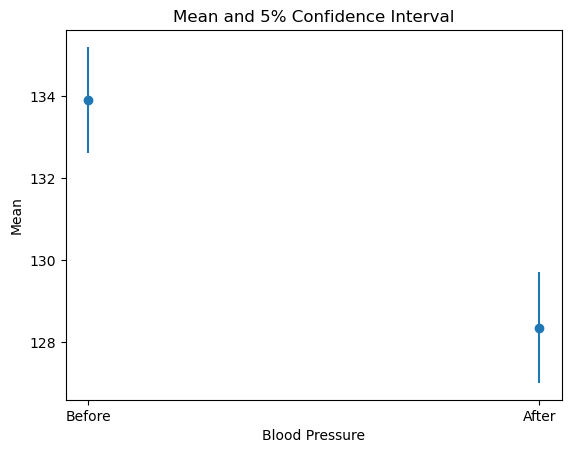

In [8]:
# Plot means and confidence intervals
plt.errorbar(x=['Before', 'After'], y=[mean_before, mean_after],
             yerr=[1.96 * std_error_before, 1.96 * std_error_after], fmt='o')
plt.xlabel('Blood Pressure')
plt.ylabel('Mean')
plt.title('Mean and 5% Confidence Interval')
plt.show()

c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [9]:
# Calculate Mean Absolute Deviation (MAD) and Standard Deviation (SD)
mad_before = np.mean(np.abs(data[' Blood Pressure Before (mmHg)'] - mean_before))
mad_after = np.mean(np.abs(data[' Blood Pressure After (mmHg)'] - mean_after))
std_before = np.std(data[' Blood Pressure Before (mmHg)'])
std_after = np.std(data[' Blood Pressure After (mmHg)'])
print("Mean Absolute Deviation (MAD) in 'Blood Pressure Before (mmHg)':", mad_before)
print("Mean Absolute Deviation (MAD) in 'Blood Pressure After (mmHg)':", mad_after)
print("Standard Deviation (SD) in 'Blood Pressure Before (mmHg)':", std_before)
print("Standard Deviation (SD) in 'Blood Pressure Afterv':", std_after)

Mean Absolute Deviation (MAD) in 'Blood Pressure Before (mmHg)': 5.7118
Mean Absolute Deviation (MAD) in 'Blood Pressure After (mmHg)': 5.9
Standard Deviation (SD) in 'Blood Pressure Before (mmHg)': 6.5652037287505385
Standard Deviation (SD) in 'Blood Pressure Afterv': 6.853495458523338


Interpretation: MAD measures the average absolute deviation from the mean, while SD measures the average deviation from the mean. 
Higher values indicate greater variability in the data.

d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [12]:
# Calculate correlation coefficient and p-value
correlation_coef = np.corrcoef(data[' Blood Pressure Before (mmHg)'], data[' Blood Pressure After (mmHg)'])[0, 1]
n = len(data)
df = n - 2  # Degrees of freedom
t_value = correlation_coef * np.sqrt(df / (1 - correlation_coef ** 2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), df=df))

# Check significance at 1% level of significance
alpha = 0.01
if p_value < alpha:
    significance = "Significant correlation"
else:
    significance = "No significant correlation"

# Interpret the results
print("Correlation Coefficient:", correlation_coef)
print("p-value:", p_value)
print(significance)


Correlation Coefficient: 0.9779485966556016
p-value: 0.0
Significant correlation
